In [2]:
!pip install webdriver_manager

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as chromeService
from webdriver_manager.chrome import ChromeDriverManager

In [2]:
driver = webdriver.Chrome(service=chromeService(ChromeDriverManager().install()))

In [1]:
url = 'https://www.premierleague.com/results?co=1&se=274&cl=-1'
driver.get(url)

NameError: name 'driver' is not defined

In [4]:
from bs4 import BeautifulSoup

In [24]:
soup = BeautifulSoup(driver.page_source,"html.parser")

In [25]:
tables = soup.find_all("tr")
tables

[<tr>
 <th class="stats-table__header-rank" scope="col">Rank</th>
 <th scope="col">Player</th>
 <th class="hide-s" scope="col">Club</th>
 <th class="hide-s" scope="col">Nationality</th>
 <th scope="col">Stat</th>
 <th class="table__order">
 <span class="table__reorder-stats-button js-reorder-stats-button">
 <span class="icn sort"></span>
 </span>
 </th>
 </tr>,
 <tr class="table__row"> <td class="stats-table__rank">1.</td> <td class="stats-table__player"> <a class="playerName" href="//www.premierleague.com/players/3960/player/overview">  Harry Kane</a> </td> <td class="hide-s">   -  </td> <td class="hide-s"> <div class="stats-table__cell-icon-align"> <img class="stats-table__flag-icon" src="https://resources.premierleague.com/premierleague/flags/GB-ENG.png"/> <span class="playerCountry">England</span> </div> </td> <td class="stats-table__main-stat">23</td> <td> </td> </tr>,
 <tr class="table__row"> <td class="stats-table__rank">2.</td> <td class="stats-table__player"> <a class="playerN

In [49]:
tables[0]
for header in tables[0].findAll("th"):
    print (header.text)
    print("****")

Rank
****
Player
****
Club
****
Nationality
****
Stat
****





****


In [ ]:
tables

In [56]:
columns=[]
for header in tables[0].findAll("th"):
    columns.append(header.text)
columns

['Rank', 'Player', 'Club', 'Nationality', 'Stat', '\n\n\n\n']

In [57]:
del(columns[-1])

In [58]:
columns

['Rank', 'Player', 'Club', 'Nationality', 'Stat']

In [59]:
harry = tables[2].findAll("td")
rank = harry[0].text

In [60]:
rank

'2.'

In [61]:
nom = harry[1].text
club = harry[2].text
nat = harry[3].text
nbr_but = harry[4].text

In [62]:
values = [rank.strip(),nom.strip(),club.strip(),nat.strip(),nbr_but.strip()]
values

['2.', 'Mohamed Salah', 'Liverpool', 'Egypt', '22']

In [34]:
import pandas as pd

In [35]:
df = pd.DataFrame([values])
df.columns = columns
df

,Rank,Player,Club,Nationality,Stat
0,1.,Harry Kane,-,England,23


In [36]:
len(tables)

11

In [ ]:
jrs = [] 
for i in range(len(tables)):
    if (i==0):
        continue
    for header in tables[i].findAll("td"):
        jrs.append(header.text)
jrs

In [54]:
jrs = [] 
for i in range(len(tables)):
    if (i==0):
        continue
    values = tables[i].findAll("td")
    print(values[1].text)

   Harry Kane 
   Mohamed Salah 
   Bruno Fernandes 
   Patrick Bamford 
   Son Heung-Min 
   Dominic Calvert-Lewin 
   Jamie Vardy 
   Ollie Watkins 
   Ilkay Gündogan 
   Alexandre Lacazette 


In [71]:
for i in range(len(tables)):
    if (i==0):
        continue
    nom = values[1].text
    club = values[2].text
    nat = values[3].text
    nbr_but = values[4].text 

In [75]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [74]:
rank=[]
player=[]
club=[]
nationality=[]
stat=[]

while(True):
    for i in range(len(tables)):
        values = tables[i].findAll("td")
        rank.append(values[0].text.strip())
        player.append(values[1].text.strip())
        club.append(values[2].text.strip())
        nationality.append(values[3].text.strip())
        stat.append(values[4].text.strip())
    suivant_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR,".paginationNexcontainer")))
    suivant_button.click
    if "inactive" in suivant_button.get_attribute("class"):
        break

IndexError: list index out of range

In [78]:
rank = []
player =[]
club =[]
nationality =[]
stat =[]

while (True):
    soup = BeautifulSoup(driver.page_source,'html.parser')
    tables = soup.find_all('tr')
    for i in range(1, len(tables)):
        values = tables[i].findAll("td")
        rank.append(values[0].text.strip())
        player.append(values[1].text.strip())
        club.append(values[2].text.strip())
        nationality.append(values[3].text.strip())
        stat.append(values[4].text.strip())
    suivant_button = WebDriverWait(driver, 10).until(EC.element_to_be_clickable((By.CSS_SELECTOR, ".paginationNextContainer")))
    suivant_button.click()
    if "inactive" in suivant_button.get_attribute("class"):
        break

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=116.0.5845.96)
Stacktrace:
	GetHandleVerifier [0x006337C3+48947]
	(No symbol) [0x005C8551]
	(No symbol) [0x004CC92D]
	(No symbol) [0x004B36E5]
	(No symbol) [0x00518CDB]
	(No symbol) [0x00527113]
	(No symbol) [0x00514E86]
	(No symbol) [0x004F16C7]
	(No symbol) [0x004F284D]
	GetHandleVerifier [0x0087FDF9+2458985]
	GetHandleVerifier [0x008C744F+2751423]
	GetHandleVerifier [0x008C1361+2726609]
	GetHandleVerifier [0x006B0680+560624]
	(No symbol) [0x005D238C]
	(No symbol) [0x005CE268]
	(No symbol) [0x005CE392]
	(No symbol) [0x005C10B7]
	BaseThreadInitThunk [0x779500C9+25]
	RtlGetAppContainerNamedObjectPath [0x77A97B1E+286]
	RtlGetAppContainerNamedObjectPath [0x77A97AEE+238]


In [41]:
tables[0]
for header in tables[0].findAll("th"):
    print (header.text)
    print("****")

Rank
****
Player
****
Club
****
Nationality
****
Stat
****





****


In [42]:
columns=[]
for header in tables[0].findAll("th"):
    columns.append(header.text)
columns

['Rank', 'Player', 'Club', 'Nationality', 'Stat', '\n\n\n\n']

In [47]:
del(columns[-1])

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la page des résultats de Liverpool en 2019
url = 'https://www.premierleague.com/clubs/10/Liverpool/results?co=1&se=79'

# Envoi d'une requête au serveur pour récupérer le contenu de la page
response = requests.get(url)

# Analyse du contenu de la page avec BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Extraction des résultats des matchs
match_results = []
match_dates = []

# Recherche des éléments contenant les résultats et les dates
results_elements = soup.find_all('td', class_='matchResult')
dates_elements = soup.find_all('td', class_='date')

# Extraction des résultats et des dates
for result, date in zip(results_elements, dates_elements):
    match_results.append(result.text.strip())
    match_dates.append(date.text.strip())

# Création d'un DataFrame avec les résultats
df = pd.DataFrame({'Date': match_dates, 'Résultat': match_results})


In [9]:
# Comptage des victoires, des nuls et des défaites
df['Résultat'] = df['Résultat'].astype(str)

victoires = df['Résultat'].str.count('W').sum()
nuls = df['Résultat'].str.count('D').sum()
defaites = df['Résultat'].str.count('L').sum()

# Calcul du pourcentage de victoires
pourcentage_victoires = (victoires / len(df)) * 100

# Affichage des statistiques
print(f"Victoires : {victoires}")
print(f"Matchs Nuls : {nuls}")
print(f"Défaites : {defaites}")
print(f"Pourcentage de Victoires : {pourcentage_victoires:.2f}%")


Victoires : 0
Matchs Nuls : 0
Défaites : 0
Pourcentage de Victoires : nan%


C:\Users\ML2 GROUP\AppData\Local\Temp\ipykernel_17612\3969985420.py:9: RuntimeWarning: invalid value encountered in scalar divide
  pourcentage_victoires = (victoires / len(df)) * 100


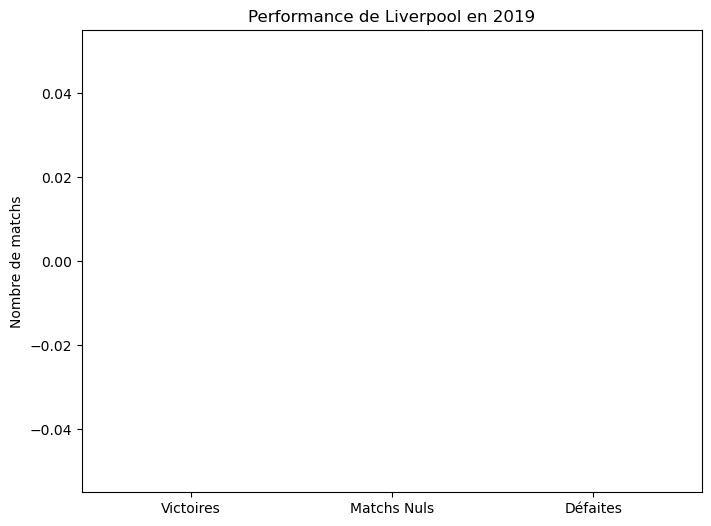

In [10]:
import matplotlib.pyplot as plt

# Création d'un graphique à barres pour montrer les résultats
results_count = [victoires, nuls, defaites]
labels = ['Victoires', 'Matchs Nuls', 'Défaites']

plt.figure(figsize=(8, 6))
plt.bar(labels, results_count, color=['green', 'yellow', 'red'])
plt.title('Performance de Liverpool en 2019')
plt.ylabel('Nombre de matchs')
plt.show()


In [21]:
import requests

In [22]:
url = "https://www.premierleague.com/results?co=1&se=274&cl=-1"

In [23]:
data = requests.get(url)

In [24]:
from bs4 import BeautifulSoup

In [25]:
soup = BeautifulSoup(data.text)

In [30]:
standings_table = soup.find_all("ul")

In [31]:
standings_table

[<ul class="clubList" role="menu">
 <li class="clubList__club">
 <a class="clubList__link" href="        http://www.arsenal.com?utm_source=premier-league-website&amp;utm_campaign=website&amp;utm_medium=link
 " role="menuitem" target="_blank">
 <div class="badge badge--large badge-image-container" data-size="50" data-widget="club-badge-image">
 <img class="badge-image badge-image--50 js-badge-image" src="https://resources.premierleague.com/premierleague/badges/50/t3.png" srcset="https://resources.premierleague.com/premierleague/badges/50/t3@x2.png 2x"/>
 <span class="visuallyHidden">Arsenal</span>
 </div>
 <span class="name">Arsenal</span>
 </a>
 </li>
 <li class="clubList__club">
 <a class="clubList__link" href="        https://www.avfc.co.uk/?utm_source=premier-league-website&amp;utm_campaign=website&amp;utm_medium=link
 " role="menuitem" target="_blank">
 <div class="badge badge--large badge-image-container" data-size="50" data-widget="club-badge-image">
 <img class="badge-image badg

In [32]:
standings_table[0]

<ul class="clubList" role="menu">
<li class="clubList__club">
<a class="clubList__link" href="        http://www.arsenal.com?utm_source=premier-league-website&amp;utm_campaign=website&amp;utm_medium=link
" role="menuitem" target="_blank">
<div class="badge badge--large badge-image-container" data-size="50" data-widget="club-badge-image">
<img class="badge-image badge-image--50 js-badge-image" src="https://resources.premierleague.com/premierleague/badges/50/t3.png" srcset="https://resources.premierleague.com/premierleague/badges/50/t3@x2.png 2x"/>
<span class="visuallyHidden">Arsenal</span>
</div>
<span class="name">Arsenal</span>
</a>
</li>
<li class="clubList__club">
<a class="clubList__link" href="        https://www.avfc.co.uk/?utm_source=premier-league-website&amp;utm_campaign=website&amp;utm_medium=link
" role="menuitem" target="_blank">
<div class="badge badge--large badge-image-container" data-size="50" data-widget="club-badge-image">
<img class="badge-image badge-image--50 js-b

In [36]:
links = standings_table[0].find_all('a')

In [37]:
links = [l.get("href") for l in links]

In [38]:
links = [l for l in links if '/squads' in l]

In [44]:
team_urls = [f"https://www.premierleague.com{l}" for l in links]

In [45]:
team_urls

[]

In [46]:
import pandas as pd

matches = pd.read_html(data.text, match="ClubList")[0]

ImportError: html5lib not found, please install it